In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import polars as pl
from importlib import reload
import transistor_count
reload(transistor_count)
from transistor_count import product_list, Product, product_type

In [2]:
df = pl.DataFrame({
        "name": [p.name for p in product_list],
        "product_type": [p.product_type for p in product_list],
        "year": [p.year for p in product_list],
        "transistor_count": [p.transistor_count for p in product_list],
        "manufacturer": [p.manufacturer for p in product_list],
        "show": [p.show for p in product_list],
        "dx": [p.dx for p in product_list],
        "dy": [p.dy for p in product_list]
    },
    schema_overrides={
        "product_type": product_type
    }
)

In [3]:
from matplotlib import font_manager

font_dirs = ["/usr/share/fonts/OTF", "/usr/share/fonts/TTF", "/usr/share/fonts/libertinus"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")  # Clean and minimal
plt.rcParams['figure.dpi'] = 300
mpl.rcParams.update({
    "font.family": "Libertinus Sans",
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

Intel 4004
Intel 8086
ARM 1
POWER1
Pentium
K5
Pentium 4 Willamette
Itanium 2
Core i7
M1
M3 Max
M3 Ultra
GV100
GB200
TPUv4
WSE-1
WSE-2
WSE-3
Dojo D1 Tile


Text(0.5, 66.81249999999996, 'Year')

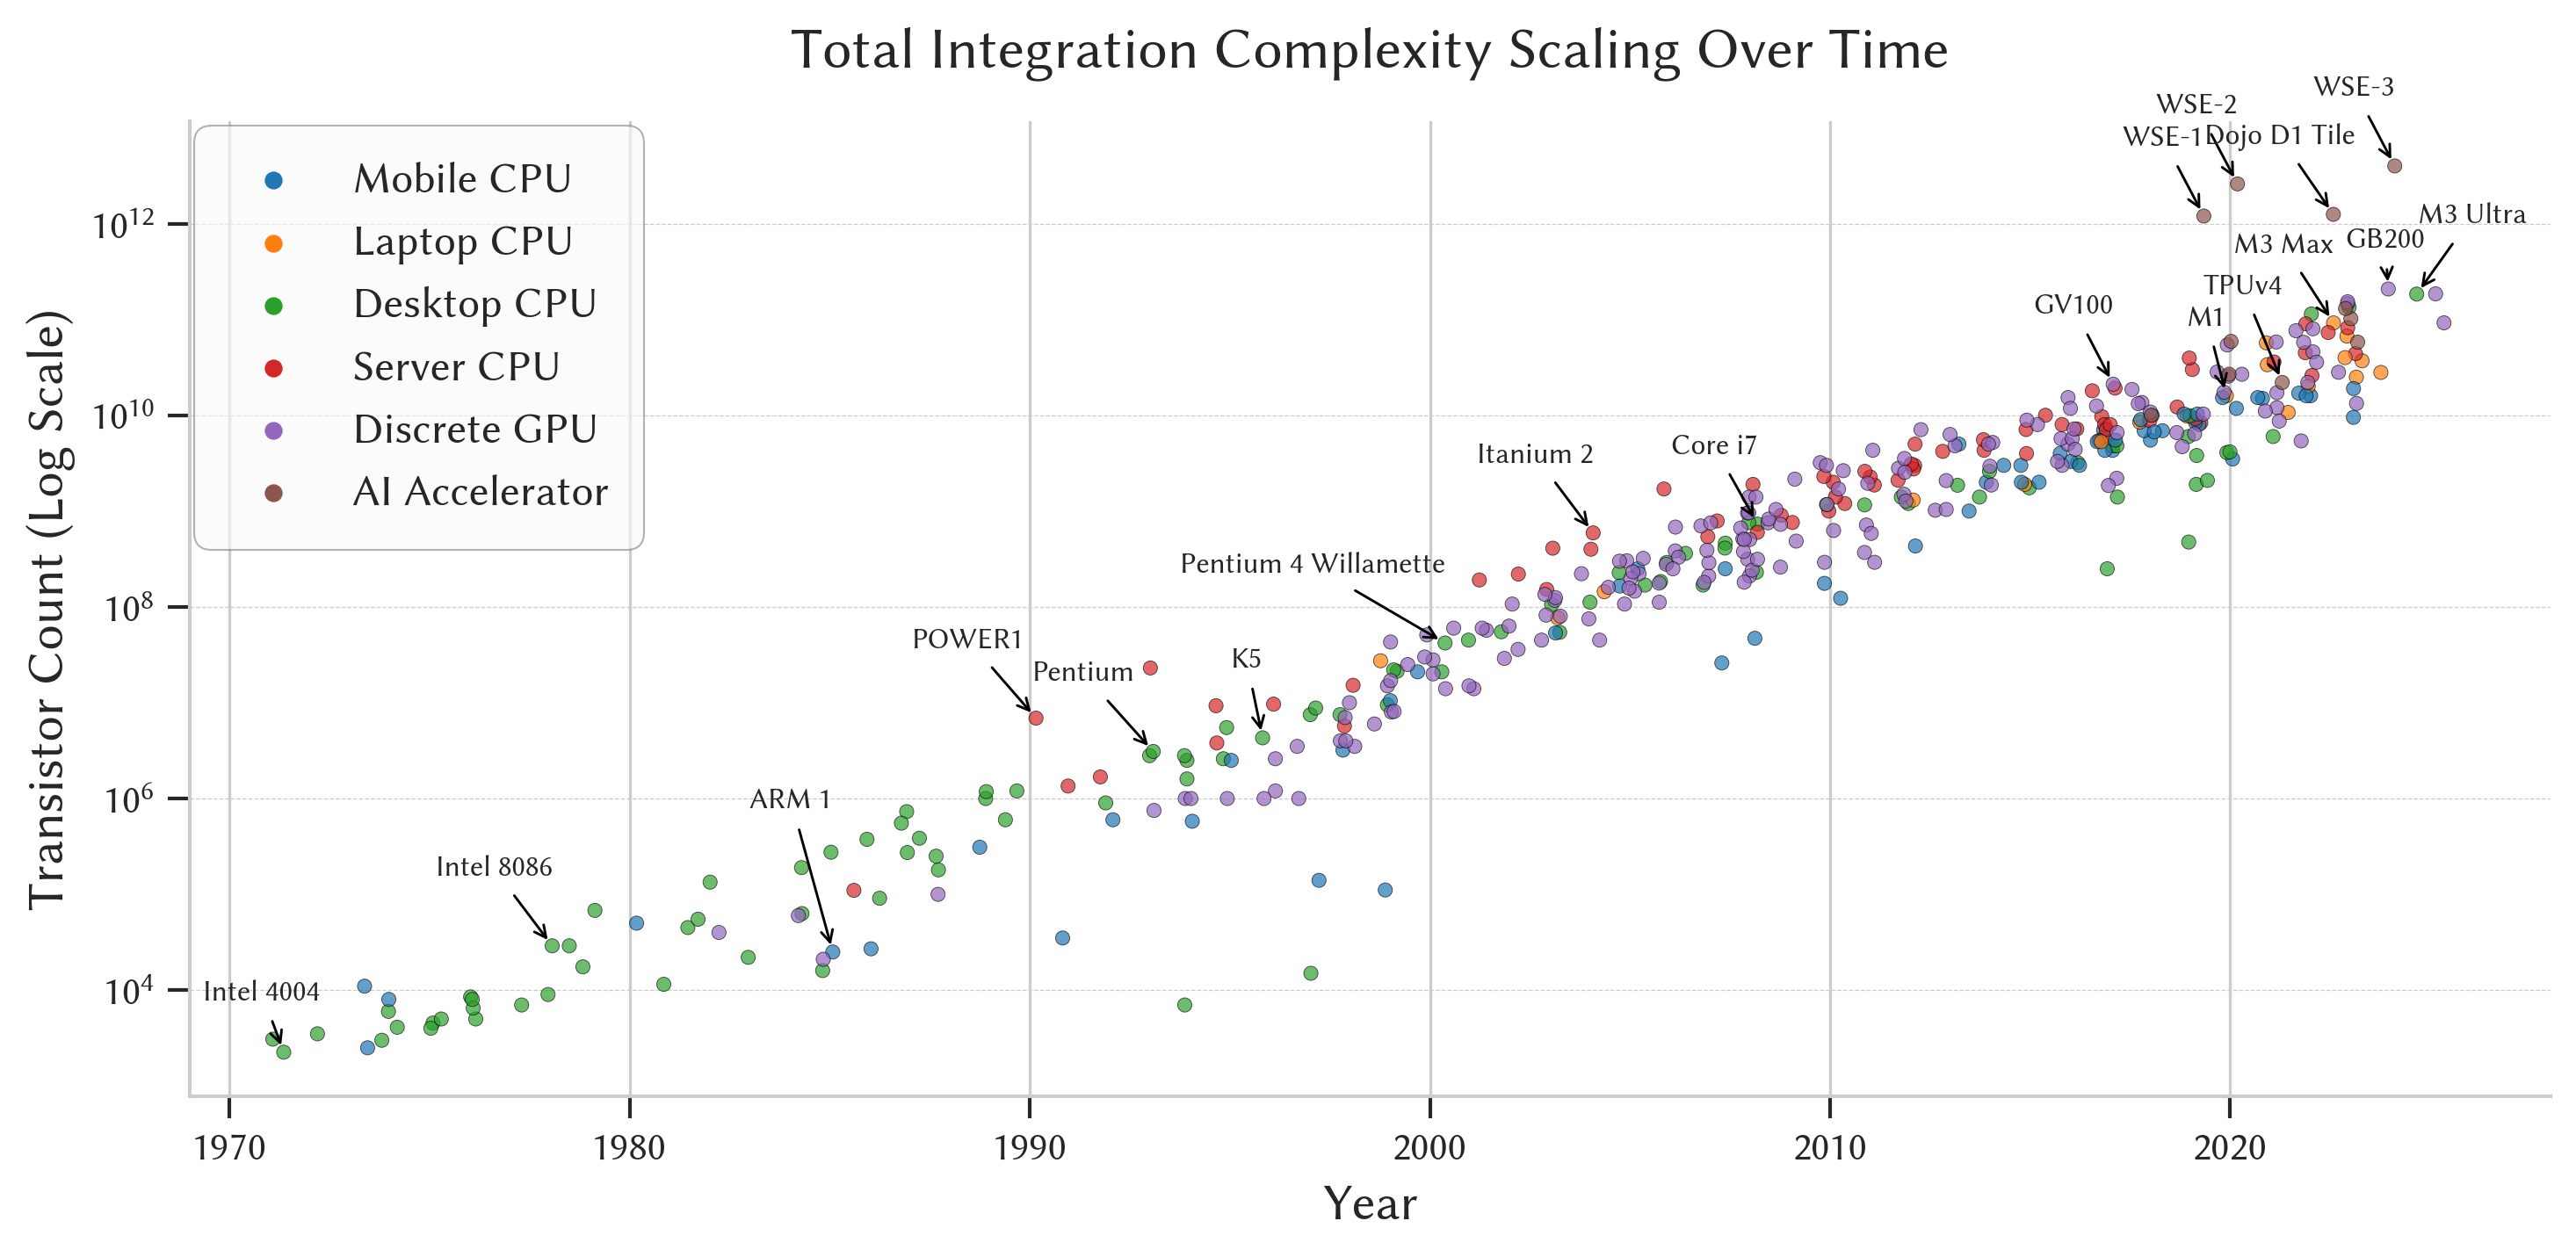

In [18]:
# Get unique product types and assign each a color
unique_types = list(product_type.categories)
color_map = mpl.colormaps["tab10"]

# Map product type to color
type_to_color = {ptype: color_map(i) for i, ptype in enumerate(unique_types)}
colors = [type_to_color[ptype] for ptype in df["product_type"]]

# Add horizontal jitter to years
years = df["year"].to_numpy()
np.random.seed(0)  # for reproducibility
jitter = np.random.normal(scale=0.2, size=len(years))  # adjust jitter scale as needed
jittered_years = years + jitter

fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy()
ax.scatter(jittered_years, df["transistor_count"], c=colors, s=15, alpha=0.7, edgecolors='k', linewidths=0.2)

rows_to_show = df.with_row_index().filter(pl.col('show') == True)['index']
for row_idx in rows_to_show:
    row = df[row_idx]
    print(row['name'].item())
    ax.annotate(
            row['name'].item(),
            xy=(jittered_years[row_idx], row['transistor_count'].item()),
            xytext=(row['dx'].item(), row['dy'].item()),  # offset in points
            textcoords="offset points",
            fontsize=8,
            ha="right",
            va="top",
            arrowprops=dict(arrowstyle="->", lw=0.7, color="black")
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', length=6, width=1)
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.3)
ax.set(xlim=(1969, 2028))

# Add legend
for ptype in unique_types:
    ax.scatter([], [], color=type_to_color[ptype], label=ptype, s=15)
legend = ax.legend(
    loc="best",
    frameon=True,
    facecolor="#f9f9f9",   # soft light gray background
    edgecolor="gray",
    framealpha=0.6
)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_boxstyle("round,pad=0.4")

ax.set_title("Total Integration Complexity Scaling Over Time", pad=15)
fig.tight_layout(pad=2)

ax.set_ylabel("Transistor Count (Log Scale)")
ax.set_xlabel("Year")

In [20]:
fig.savefig("integration_complexity_over_time.svg", format="svg", bbox_inches="tight")